In [1]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_pil_image
from torchvision.io import read_image
from torchvision import transforms
from PIL import Image
from collections import Counter

import os
import sys
import json
import random as rnd

1. ResNet50 regularization

In [2]:
METRICS_PATH = "../results"

resnet_a1_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a1_d0.5(23-11_21-51).json")
resnet_a1_epoch = list(range(len(resnet_a1_metrics_df)))

resnet_a2_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a2_d0.5(23-11_22-01).json")
resnet_a2_epoch = list(range(len(resnet_a2_metrics_df)))

resnet_wd_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a2_wd1e-4_d0.5(23-11_22-14).json")
resnet_wd_epoch = list(range(len(resnet_wd_metrics_df)))

resnet_ls_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a2_wd1e-4_ls0.1_d0.5(23-11_22-26).json")
resnet_ls_epoch = list(range(len(resnet_ls_metrics_df)))

resnet_no_reg_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_fine_tuning(22-11_16-01).json")
resnet_no_reg_epoch = list(range(len(resnet_no_reg_metrics_df)))

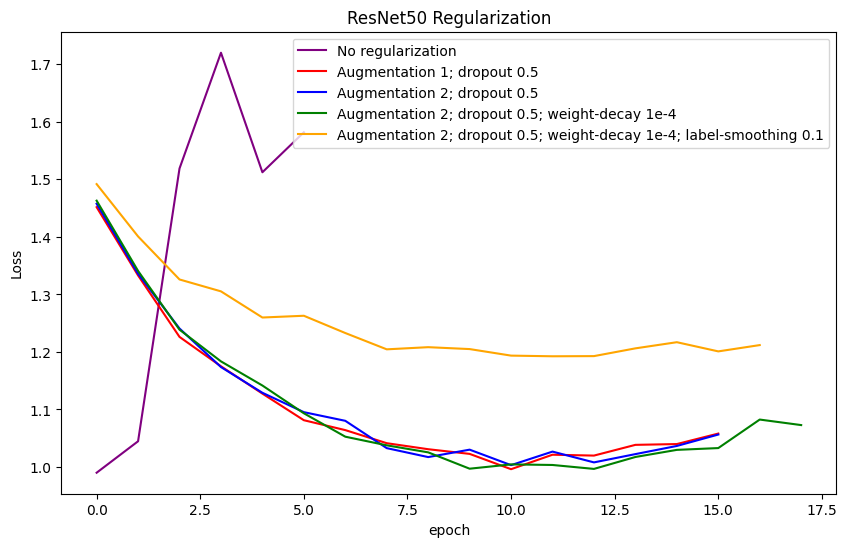

In [3]:
# loss visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(x=resnet_no_reg_epoch, y=resnet_no_reg_metrics_df["val_loss"], label="No regularization", color="purple")
sns.lineplot(x=resnet_a1_epoch, y=resnet_a1_metrics_df["val_loss"], label="Augmentation 1; dropout 0.5", color="red")
sns.lineplot(x=resnet_a2_epoch, y=resnet_a2_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5", color="blue")
sns.lineplot(x=resnet_wd_epoch, y=resnet_wd_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5; weight-decay 1e-4", color="green")
sns.lineplot(x=resnet_ls_epoch, y=resnet_ls_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5; weight-decay 1e-4; label-smoothing 0.1", color="orange")

plt.title("ResNet50 Regularization")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

2. EfficientNet-b0 regularization

In [4]:
efficientb0_a1_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a1_d0.5(24-11_00-18).json")
efficientb0_a1_epoch = list(range(len(efficientb0_a1_metrics_df)))

efficientb0_a2_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a2_d0.5(24-11_00-47).json")
efficientb0_a2_epoch = list(range(len(efficientb0_a2_metrics_df)))

efficientb0_wd_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a2_wd1e-4_d0.4(24-11_01-09).json")
efficientb0_wd_epoch = list(range(len(efficientb0_wd_metrics_df)))

efficientb0_ls_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a2_wd1e-4_ls0.1_d0.4(24-11_01-27).json")
efficientb0_ls_epoch = list(range(len(efficientb0_ls_metrics_df)))

efficientb0_ls_no_wd_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a1_d0.4_ls0.05(24-11_13-50).json")
efficientb0_ls_no_wd_epoch = list(range(len(efficientb0_ls_no_wd_metrics_df)))

efficientb0_no_reg_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_16-06).json")
efficientb0_no_reg_epoch = list(range(len(efficientb0_no_reg_metrics_df)))

best_efficientb0_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_18-46).json")
best_efficientb0_epoch = list(range(len(best_efficientb0_metrics_df)))
best_efficientb0_metrics_df

,train_loss,val_loss,val_acc,val_precision,val_recall,val_f1
0,1.270650,1.081449,0.592593,0.584141,0.587602,0.540873
1,0.954840,0.956756,0.673401,0.625459,0.631554,0.627049
2,0.761805,0.901936,0.670034,0.631480,0.647847,0.629996
3,0.627702,0.882545,0.700337,0.657982,0.674976,0.661597
4,0.458815,0.975044,0.720539,0.690528,0.695007,0.689322
5,0.378223,1.054666,0.693603,0.656612,0.649140,0.649646
6,0.302785,1.089693,0.710438,0.669290,0.681337,0.673713
7,0.255464,1.065259,0.707071,0.665790,0.681671,0.670913
8,0.205289,1.132269,0.720539,0.686089,0.679133,0.681378


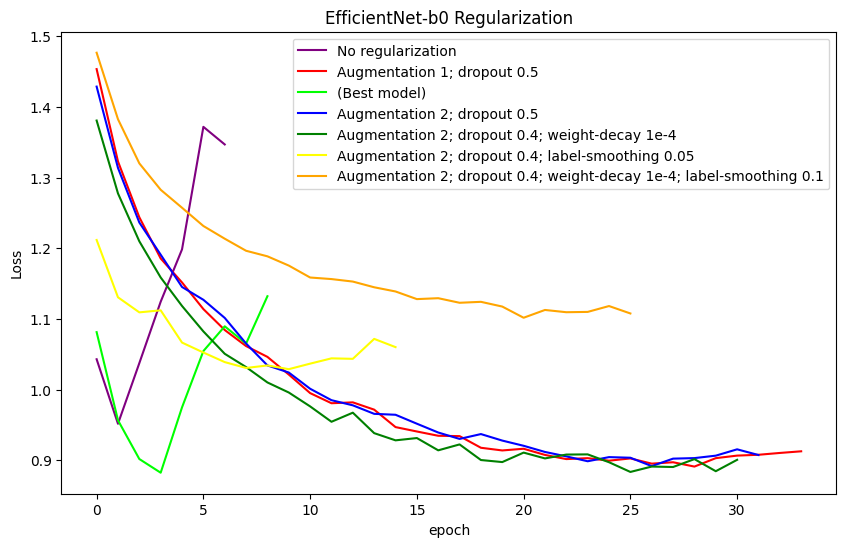

In [5]:
# loss visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(x=efficientb0_no_reg_epoch, y=efficientb0_no_reg_metrics_df["val_loss"], label="No regularization", color="purple")
sns.lineplot(x=efficientb0_a1_epoch, y=efficientb0_a1_metrics_df["val_loss"], label="Augmentation 1; dropout 0.5", color="red")
sns.lineplot(x=best_efficientb0_epoch, y=best_efficientb0_metrics_df["val_loss"], label="(Best model)", color="lime")
sns.lineplot(x=efficientb0_a2_epoch, y=efficientb0_a2_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5", color="blue")
sns.lineplot(x=efficientb0_wd_epoch, y=efficientb0_wd_metrics_df["val_loss"], label="Augmentation 2; dropout 0.4; weight-decay 1e-4", color="green")
sns.lineplot(x=efficientb0_ls_no_wd_epoch, y=efficientb0_ls_no_wd_metrics_df["val_loss"], label="Augmentation 2; dropout 0.4; label-smoothing 0.05", color="yellow")
sns.lineplot(x=efficientb0_ls_epoch, y=efficientb0_ls_metrics_df["val_loss"], label="Augmentation 2; dropout 0.4; weight-decay 1e-4; label-smoothing 0.1", color="orange")

plt.title("EfficientNet-b0 Regularization")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

3. ensemble vs best model

In [6]:
metrics_ensemble_df = pd.read_json(f"{METRICS_PATH}/metrics_ensemble(24-11_19-07).json")
ensemble_epoch = list(range(len(metrics_ensemble_df)))
metrics_ensemble_df

,test_accuracy,test_precision,test_recall,test_f1,confusion_matrix,ensemble_size,checkpoint_paths
0,0.705686,0.653651,0.66571,0.655937,"[91, 2, 0, 0, 0]",5,checkpoints\checkpoint_efficientnet_b0_fine_tu...
1,0.705686,0.653651,0.66571,0.655937,"[4, 48, 8, 3, 2]",5,checkpoints\checkpoint_efficientnetb0_a1_d0.5(...
2,0.705686,0.653651,0.66571,0.655937,"[8, 10, 33, 11, 7]",5,checkpoints\checkpoint_efficientnetb0_a2_d0.5(...
3,0.705686,0.653651,0.66571,0.655937,"[1, 6, 11, 21, 6]",5,checkpoints\checkpoint_efficientnetb0_a2_wd1e-...
4,0.705686,0.653651,0.66571,0.655937,"[0, 2, 4, 3, 18]",5,checkpoints\checkpoint_resnet50_a2_wd1e-4_d0.5...


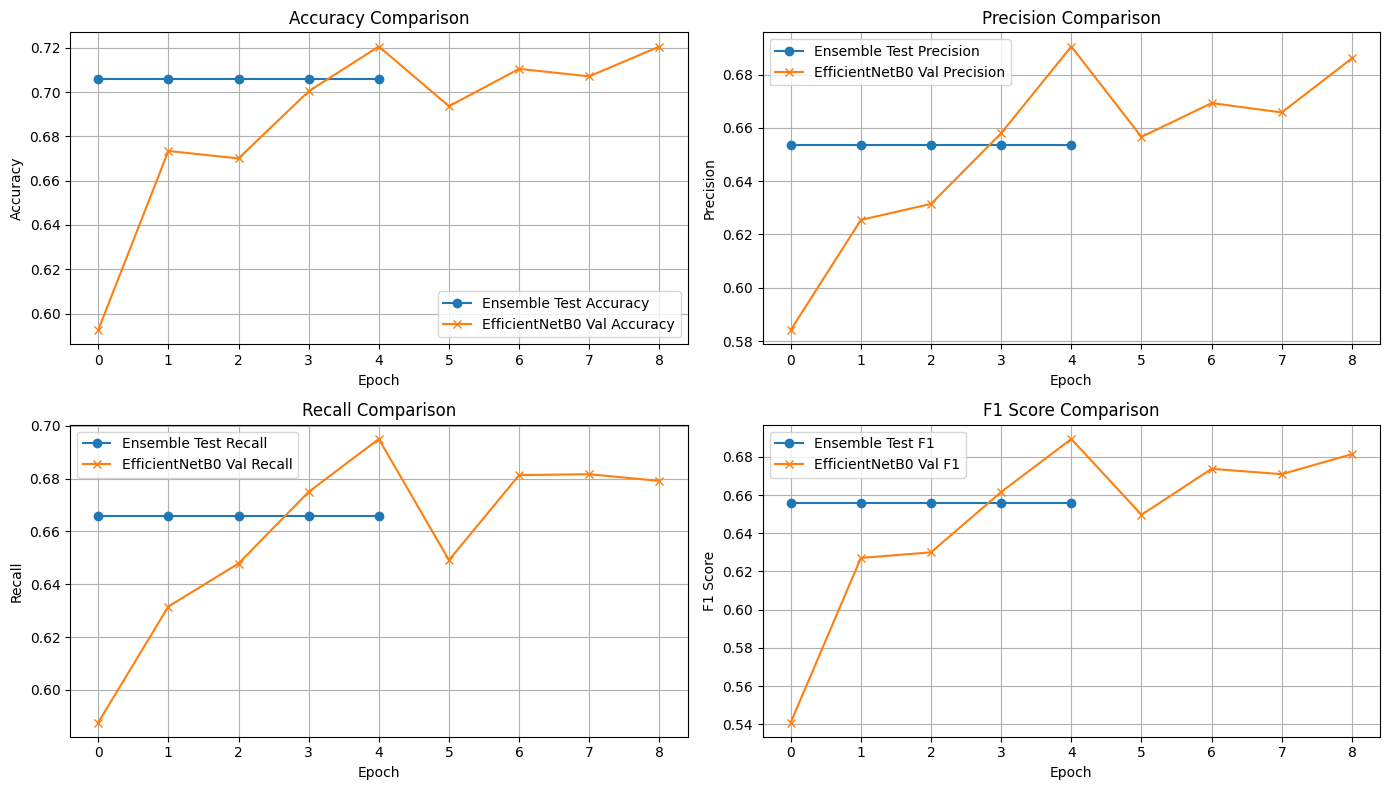

In [7]:
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(ensemble_epoch, metrics_ensemble_df['test_accuracy'], label='Ensemble Test Accuracy', marker='o')
plt.plot(best_efficientb0_epoch, best_efficientb0_metrics_df['val_acc'], label='EfficientNetB0 Val Accuracy', marker='x')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(ensemble_epoch, metrics_ensemble_df['test_precision'], label='Ensemble Test Precision', marker='o')
plt.plot(best_efficientb0_epoch, best_efficientb0_metrics_df['val_precision'], label='EfficientNetB0 Val Precision', marker='x')
plt.title('Precision Comparison')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(ensemble_epoch, metrics_ensemble_df['test_recall'], label='Ensemble Test Recall', marker='o')
plt.plot(best_efficientb0_epoch, best_efficientb0_metrics_df['val_recall'], label='EfficientNetB0 Val Recall', marker='x')
plt.title('Recall Comparison')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

# F1 Score
plt.subplot(2, 2, 4)
plt.plot(ensemble_epoch, metrics_ensemble_df['test_f1'], label='Ensemble Test F1', marker='o')
plt.plot(best_efficientb0_epoch, best_efficientb0_metrics_df['val_f1'], label='EfficientNetB0 Val F1', marker='x')
plt.title('F1 Score Comparison')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
sys.path.append(os.path.abspath(".."))
from models.transfer_models import TransferEfficientNetb0

DS_DIR = "../data"
dataset = datasets.ImageFolder(DS_DIR)
classes = dataset.classes

CHECKPOINT_PATH="../checkpoints/checkpoint_efficientnet_b0_fine_tuning(best).pth"
checkpoint = torch.load(CHECKPOINT_PATH, map_location="cuda")
model = TransferEfficientNetb0(len(classes), dropout_rate=0)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

TransferEfficientNetb0(
  (_backbone): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
         

In [9]:
from training.data_processor import DataProcessor
from training.config import (
    BATCH_SIZE, MANUAL_SEED, IMAGE_SIZE, TRAIN_VAL_TEST_SPLIT
)

processor = DataProcessor(
    data_path="../data",
    image_size=IMAGE_SIZE,
    train_val_test_split=(TRAIN_VAL_TEST_SPLIT),
    manual_seed=MANUAL_SEED
)
_, _, ds = processor.process(
    batch_size=BATCH_SIZE,
    augmentation_level=0,
)
data_loader = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=3)

In [10]:
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in data_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)

        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_probs = np.concatenate(all_probs, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

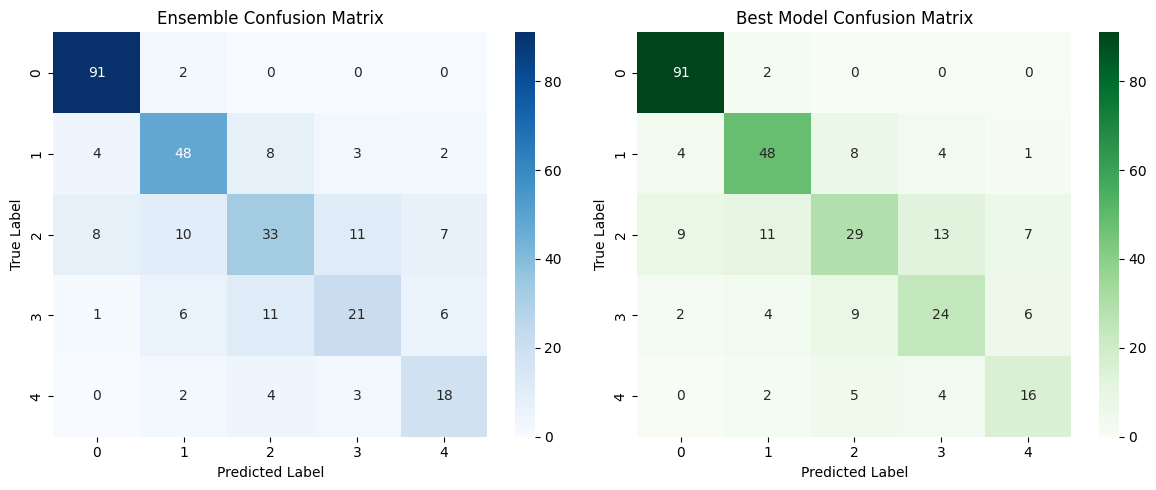

In [11]:
all_preds = np.argmax(all_probs, axis=1)
ensemble_cm_matrix = np.array(metrics_ensemble_df['confusion_matrix'].tolist())

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(ensemble_cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Ensemble Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1,2,2)
cm_best = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title("Best Model Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()